# Линейная регрессия

Итак, для построения линейной регрессии нам нужно пройти следующие темы:

1) Loss function  
2) Optimizer (gradient descent)  
3) Train_test_split  
4) Optimization  
5) Regularization (L1, L2)  
6) Metrics

# Давайте решим задачу линейной регрессии

Будем разбирать задачу [Boston Housing](https://www.kaggle.com/c/boston-housing). Где нужно определить цену дома.

In [130]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [208]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Отлично, мы добавили наш датасет, теперь давайте добавим нашу "таргет переменную" и посмотрим как это выглядит.

In [132]:
df['target'] = boston['target']

In [133]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [134]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1) Давайте разделим нашу выборку на train и test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x, y = boston.data, boston.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
X_train.shape, y_train.shape

((404, 13), (404,))

### 2) Давайте попробуем создать модель без настройки параметров

In [10]:
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [11]:
simple_model = SGDRegressor()

In [12]:
simple_model.fit(X_train, y_train)

SGDRegressor()

In [13]:
simple_model.predict(X_test)

array([6.90513239e+13, 7.07493606e+13, 9.02659614e+13, 6.55779143e+13,
       8.39172410e+13, 5.13779824e+13, 8.71454375e+13, 7.23732357e+13,
       1.47585667e+14, 1.53905837e+14, 1.48076020e+14, 9.05183335e+13,
       1.47710930e+14, 1.48875767e+14, 7.06200786e+13, 5.29782333e+13,
       6.87630744e+13, 4.73570287e+13, 6.28354306e+13, 6.75831454e+13,
       6.58022827e+13, 9.34005761e+13, 1.48501029e+14, 5.09685451e+13,
       1.48627007e+14, 5.49611384e+13, 1.50325667e+14, 6.81672534e+13,
       1.47737410e+14, 6.84077661e+13, 9.35376557e+13, 1.46017974e+14,
       7.29412092e+13, 5.16498752e+13, 5.17734613e+13, 6.88343912e+13,
       5.56081154e+13, 5.61203733e+13, 1.42634581e+14, 8.75620747e+13,
       7.78309860e+13, 6.08137109e+13, 9.44446472e+13, 6.12581859e+13,
       1.46573018e+14, 4.45876479e+13, 1.47508539e+14, 1.48223433e+14,
       1.47683172e+14, 7.41914854e+13, 6.52024875e+13, 6.29136866e+13,
       1.46457672e+14, 1.48416818e+14, 4.88782359e+13, 4.71851420e+13,
      

### 3)Создадим функцию для отображения графиков

In [14]:
def show_graphics(y_test, y_pred):
    print("Metrics: ")
    MSE = mean_squared_error(y_test, y_pred)
    print("MSE: ", MSE)
    
    print("\n\nGraphic: ")
    x_ax = range(len(y_test))
    plt.plot(x_ax, y_test, label='original')
    plt.plot(x_ax, y_pred, label='predicted')
    plt.title("Boston test and predicted data")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

Metrics: 
MSE:  9.77245872734623e+27


Graphic: 


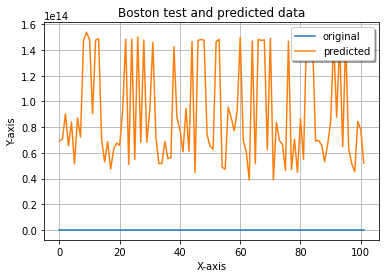

In [15]:
show_graphics(y_test, simple_model.predict(X_test))

Как видим, погрешность невероятно большая MSE ~ 10^28. Давайте попробуем это исправить.  
Для начала попробуем посмотреть на максимальные значения в наших признаках.

In [74]:
X_train.max(axis=0)

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

### 4) Давайте попробуем улучшить нашу модель, добавив нормализацию

In [16]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

Как мы видим, наши данные очень различные. В одном максимальное значение будет 0.871, а где-то 711. И хотя правильным будет обработать каждый признак в отдельности, с применением One-Hot Encoding, нормализацией. Однако это будет достаточно долго и мутарно, поэтому мы можем воспользоваться функциями из библиотек.

Давайте попробуем нормализовать данные и посмотреть на максимальные их значения.

In [75]:
normalize(X_train).max(axis=0)

array([0.11308137, 0.20764371, 0.06124919, 0.00237101, 0.00206515,
       0.01815583, 0.23762592, 0.02762361, 0.03579802, 0.99339501,
       0.05309732, 0.88980798, 0.07006318])

Это уже лучше, попробуем построить модель.

In [17]:
model_with_norm = SGDRegressor()

In [18]:
model_with_norm.fit(normalize(X_train), y_train)

SGDRegressor()

Metrics: 
MSE:  50.89061483199003


Graphic: 


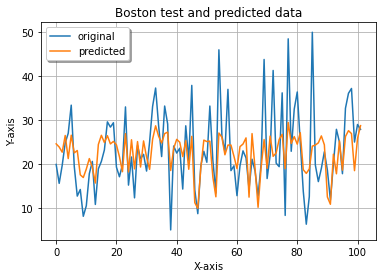

In [19]:
show_graphics(y_test, model_with_norm.predict(normalize(X_test)))

Как мы можем видеть, модель уже хоть как-то научилась предсказывать цену, однако как мы видим из графиков, делает она это достаточно посредственно. Однако это уже куда лучше, чем было раньше.

In [20]:
model_with_norm.coef_

array([-2.00431953e+00,  1.48681806e+01, -2.66509072e+00,  1.19229596e-01,
        5.93144361e-04,  1.63474365e+00, -5.86152379e+00, -2.36421689e-03,
        6.71189315e-01, -3.19064659e+00, -1.38294461e+00,  1.69143060e+01,
       -9.14968090e+00])

In [21]:
model_with_norm.intercept_

array([14.15846384])

Посмотрим на наши веса, чтобы выявить переобучение.

**Давайте попробуем тоже самое, но используя scale**

Разница между normalize и scale

In [66]:
X_train.shape

(404, 13)

In [62]:
normalize(X_train).mean(axis=0)

array([5.18895583e-03, 2.36704370e-02, 1.89041930e-02, 1.36009579e-04,
       9.90091936e-04, 1.14971287e-02, 1.20494752e-01, 7.27815401e-03,
       1.48931131e-02, 6.92846549e-01, 3.31895315e-02, 6.56790646e-01,
       2.21376208e-02])

In [63]:
scale(X_train).mean(axis=0)

array([-1.59388454e-17, -2.66563449e-17,  2.11162221e-15,  6.56790354e-17,
       -3.80993367e-15,  4.59698286e-15, -4.28699980e-16, -1.20365764e-15,
        4.17707673e-17,  5.71599973e-17,  2.10491690e-14,  7.44440263e-15,
        2.55021526e-16])

In [69]:
normalize(X_train).std(axis=0)

array([1.19469958e-02, 4.79296611e-02, 1.05814187e-02, 4.89466200e-04,
       1.99502729e-04, 2.62985985e-03, 4.87109239e-02, 4.66672768e-03,
       1.06512236e-02, 1.48205262e-01, 5.85889738e-03, 2.09589855e-01,
       1.15065497e-02])

In [70]:
scale(X_train).std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Если хотите, можете попробовать разобрать, что тут написано про scale:

Центр к среднему значению и компонентная шкала к единичной дисперсии.
Это означает, что среднее значение вдоль оси вычитается из X, а полученное значение делится на std вдоль оси.  

Это что-то сложное из теории вероятности, что понять будет достаточно сложно, а как работает normalize мы уже поговорили. В общем случае, можно использовать normalize. Качество модели будет изменяться не настолько сильно.

In [22]:
model_with_scale = SGDRegressor().fit(scale(X_train), y_train)

Metrics: 
MSE:  17.143444411035883


Graphic: 


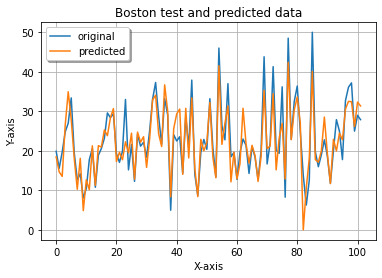

In [23]:
show_graphics(y_test, model_with_scale.predict(scale(X_test)))

### 4) Посмотрим на наши веса

In [76]:
model_with_scale.coef_

array([-0.82782896,  1.01635041,  0.25539838,  0.85059205, -1.97132574,
        2.70107411, -0.0090655 , -2.9166867 ,  2.11493288, -1.29143541,
       -2.08643593,  0.88460288, -3.91359636])

In [77]:
model_with_scale.intercept_

array([22.43200722])

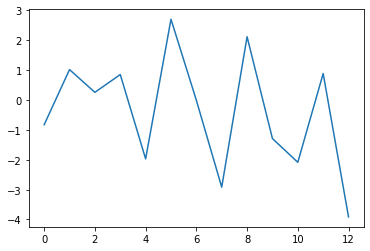

In [78]:
plt.plot(model_with_scale.coef_)

Как мы видим, веса находятся в районе $[-4;3]$

А так как наши значения являются достаточно маленькими, можем это проверить.

In [80]:
scale(X_train).mean(axis=0)

array([-1.59388454e-17, -2.66563449e-17,  2.11162221e-15,  6.56790354e-17,
       -3.80993367e-15,  4.59698286e-15, -4.28699980e-16, -1.20365764e-15,
        4.17707673e-17,  5.71599973e-17,  2.10491690e-14,  7.44440263e-15,
        2.55021526e-16])

То можно попробовать добавить регуляризацию, вдруг переобучение и правда было.

alpha=0.0001, penalty='elasticnet', eta0=0.01, epsilon=0.01

### 5) Регуляризация

Для этого давайте добавим пару параметров в нашу модель, такие как penalty и alpha.  
penalty - выбор между L1, L2 и elasticnet(совмещение двух)  
alpha - величина, с которой мы будем штрафовать нашу модель.

In [82]:
model_with_reg = SGDRegressor(alpha=0.0001, penalty='l2')

In [83]:
model_with_reg.fit(scale(X_train), y_train)

SGDRegressor()

Metrics: 
MSE:  17.326820550451608


Graphic: 


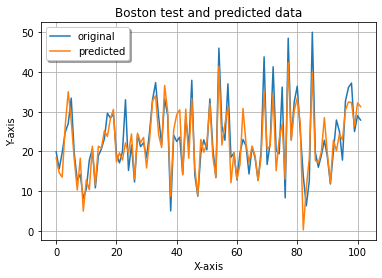

In [84]:
show_graphics(y_test, model_with_reg.predict(scale(X_test)))

### 6) Подбор гиперпараметров

Модель стала хуже работать, ведь действительно, такие параметры как alpha и тд. должны подбираться вручную, это называется гиперпараметрами.

Однако, нам может помочь еще одна библиотека, которая занимается перебором заданных гиперпараметров и поиском лучшего.

In [85]:
from sklearn.model_selection import GridSearchCV

In [101]:
model_with_params = GridSearchCV(estimator=SGDRegressor(), 
                                param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'penalty': ('l1', 'l2', 'elasticnet')})

In [102]:
model_with_params.fit(scale(X_train), y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ('l1', 'l2', 'elasticnet')})

Metrics: 
MSE:  17.103911962521114


Graphic: 


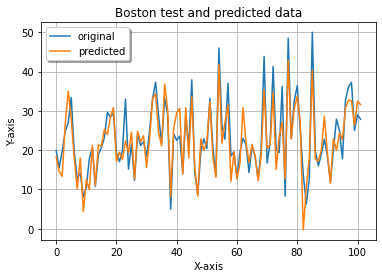

In [103]:
show_graphics(y_test, model_with_params.predict(scale(X_test)))

In [107]:
model_with_params.best_estimator_

SGDRegressor(alpha=0.001, penalty='l1')

Мы можем посмотреть параметры, которые были отобраны как лучшие

### 7) Давайте попробуем предсказать)))

У нас есть уже готовая модель с подобранными весами, давайте просто попробуем подать на нее какие-либо данные и посмотрим, что она выдаст.

##### 1) Давайте возьмем уже какие-нибудь готовые данные, которые она видела

In [115]:
model_with_params.predict([scale(X_train[40])])

array([24.45484342])

Посмотрим на реальный ответ

In [117]:
y_train[40]

25.0

Довольно близко к реальному ответу))

##### 2) Ну и наконец самое интересное, мы сгенерируем признаки сами и подадим на модель

Для начала посмотрим как выглядят наши данные вообще

In [118]:
X_train[0]

array([1.2802e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.4740e+00, 9.7100e+01, 2.4329e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 3.9524e+02, 1.2270e+01])

In [136]:
df.loc[df['CRIM'] == 1.2802e-01]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
108,0.12802,0.0,8.56,0.0,0.52,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27,19.8


Мы нашли реальный пример, а теперь давайте на его основе составим свой.

In [149]:
df.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
target      22.532806
dtype: float64

In [159]:
our_sample = df.drop('target', axis=1).mean()

In [160]:
our_sample

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [163]:
model_with_params.predict([our_sample])

array([-331.73854939])

Не стоит забывать, что мы тренировали нашу модель, используя scale. Поэтому подаем значения тоже вместе со scale

In [164]:
model_with_params.predict([scale(our_sample)])

array([22.59105199])

Мы получили среднюю цену дома в этом датасете)) А теперь давайте возьмем максимальные признаки и посмотрим, что выйдет

In [165]:
model_with_params.predict([scale(df.drop('target', axis=1).max())])

array([21.39939831])

### Можно сказать, что мы построили первую простейшую модель